## Introduction

**Formula 1** is one of the most competitive sports in the world. Engineers and technicians from every team use weather radar screens, provided by Ubimet to the teams, which allows them to track the current weather and make predictions during the race. Race engineers relay precise information to drivers, including:

* How many minutes until it starts raining
* Intensity of the rain
* Which corner will be hit first by the rain
* Duration of the rain

**Points**, and even races sometimes, are won and lost based on making sense of what the weather is going to do during a race, and being prepared as a team to act accordingly.

Therefore, weather forecasting takes a big part on the possible outcome of a race.

Similarly, F1 2021, the official Formula 1 videogame developed by Codemasters, uses a physics engine that behaves like the real world.
Competition

Follow this link to create your notebook for the challenge. You're free to choose where to create a notebook that uses the dataset. When you register your submission in the hackathon website, make sure to link a URL to the notebook you've created in the submission, and any additional material like an instructional video / external design.

Please also make sure you register your team and your submission via the hackathon website.
Challenge

**In challenge 1** of this hackathon, you will be presented with historical weather data from the RedBull Racing eSports team and you will be required develop an Artificial Intelligence model that is able to make accurate weather predictions / forecasts.

The data structure of each packet provided to you is as follows (example is a real packet from the dataset). You can have a detailed look at all structure definitions in this file. Note that in the dataset, two additional variables (not present in the game) have been added, which are:

**gamehost:** it's an unique identifier to separate different dataset consumers. It's infrastructure-related and it's a dummy variable from a qualitative perspective.

**timestamp:** UNIX timestamp when the packet was emitted.



In [3]:
! kaggle datasets download -d oracledevrel/formulaaihackathon2022

100%|█████████████████████████████████████████| 103M/103M [02:27<00:00, 990kB/s]
100%|█████████████████████████████████████████| 103M/103M [02:27<00:00, 736kB/s]


In [4]:
! unzip formulaaihackathon2022 -d datasets

Archive:  formulaaihackathon2022.zip
  inflating: datasets/weather.csv    
  inflating: datasets/weather.json   


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

## Feature/Data Understanding

In [6]:
# Read the dataframe
df = pd.read_csv('datasets/weather.csv')
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,GAMEHOST,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.088,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.167,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.238,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.298,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0,1.642362e+09,0.353,0.0,0,33,4650,0,0,f1digest,25,0,0,0,28,0,0,0,0,1,13,255,0,0,0,0,600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [7]:
# print the columns
j = 1
for i in df.columns:
    print(j, i.lower())
    j+=1

1 m_packet_format
2 m_game_major_version
3 m_game_minor_version
4 m_packet_version
5 m_packet_id
6 m_session_uid
7 m_session_time
8 m_frame_identifier
9 m_player_car_index
10 m_secondary_player_car_index
11 m_braking_assist
12 m_session_link_identifier
13 m_pit_release_assist
14 timestamp
15 m_zone_start
16 m_zone_flag
17 m_pit_stop_window_ideal_lap
18 m_track_temperature
19 m_track_length
20 m_game_paused
21 m_forecast_accuracy
22 gamehost
23 m_air_temperature
24 m_num_weather_forecast_samples
25 m_sli_pro_native_support
26 m_safety_car_status
27 m_track_id
28 m_ersassist
29 m_formula
30 m_season_link_identifier
31 m_pit_assist
32 m_gearbox_assist
33 m_session_type
34 m_spectator_car_index
35 m_pit_stop_window_latest_lap
36 m_weekend_link_identifier
37 m_dynamic_racing_line_type
38 m_session_time_left
39 m_session_duration
40 m_pit_stop_rejoin_position
41 m_weather_forecast_samples_m_session_type
42 m_time_offset
43 m_weather_forecast_samples_m_weather
44 m_weather_forecast_samples_m_

In [8]:
df.describe()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
count,3572328.0,3572328.0,3.572328e+06,3572328.0,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,974274.000000,974274.000000,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3572328.0,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,2.598054e+06,3.572328e+06,3.572328e+06,3.572328e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,0.0
mean,2021.0,1.0,1.410704e+01,1.0,1.0,8.239394e+18,1.019926e+03,2.857427e+04,9.212292e+00,255.0,6.926777e-01,1.894529e+09,3.153865e-01,1.642326e+09,0.414565,0.009579,1.881843e+00,3.185621e+01,4.890588e+03,1.366560e-02,5.711961e-02,2.407445e+01,1.388980e+01,0.0,0.0,1.588987e+01,3.153865e-01,8.147628e-03,1.894529e+09,3.153865e-01,1.630773e+00,8.246455e+00,2.546247e+02,2.185138e+00,1.894529e+09,3.153865e-01,1.558772e+03,2.471925e+03,2.164424e+00,1.667811e+00,5.917654e+00,9.705187e-02,7.615204e+00,4.123082e-01,5.993771e+00,4.199920e-01,1.147212e+00,3.304962e-01,4.595344e+01,7.583221e+01,2.261691e-01,1.709807e+02,1.580382e-01,1.487266e-03,6.307732e-01,3.153866e-01,1.687091e+01,NaN
std,0.0,0.0,3.091641e-01,0.0,0.0,5.119260e+18,1.682487e+03,5.428773e+04,9.217495e+00,0.0,1.178056e+00,1.345200e+09,4.646697e-01,5.468145e+05,0.315565,0.147761,8.317268e+00,2.457039e+00,6.615081e+02,1.160985e-01,2.320711e-01,2.703748e+00,1.642868e+01,0.0,0.0,1.238743e+01,4.646697e-01,1.561298e-01,1.345200e+09,4.646697e-01,9.293394e-01,3.896537e+00,9.725290e+00,9.589723e+00,1.345200e+09,4.646697e-01,2.070011e+03,2.389139e+03,5.387997e+00,3.339838e+00,1.642600e+01,3.251820e-01,1.331635e+01,7.645373e-01,1.049220e+01,7.746689e-01,3.353760e+00,7.195647e-01,3.811992e+01,8.123138e+00,4.183500e-01,6.422035e+01,3.647768e-01,3.853640e-02,9.293394e-01,4.646697e-01,1.092343e+00,NaN
min,2021.0,1.0,1.400000e+01,1.0,1.0,2.106082e+16,4.000000e-03,0.000000e+00,0.000000e+00,255.0,0.000000e+00,0.000000e+00,0.000000e+00,1.641391e+09,0.000000,0.000000,0.000000e+00,2.300000e+01,3.323000e+03,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,NaN
25%,2021.0,1.0,1.400000e+01,1.0,1.0,3.591802e+18,

In [9]:
df['M_WEATHER'].value_counts()

0    2664421
1     763609
2     101486
5      42812
Name: M_WEATHER, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

In [11]:
# How many object dtypes are there in our dataframe
for i, j in enumerate(df.dtypes):
    if j == 'object':
        print(df.columns[i])

GAMEHOST


We have `GAMEHOST` as the only object datatype in our dataframe.

In [12]:
# How large is our dataset
print(f'There are {len(df)} rows available to explore')

There are 3572328 rows available to explore


In [13]:
# Are there missing values?
df.isna().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

## Fill the missing values

In [14]:
df['M_ZONE_START'].describe()

count    974274.000000
mean          0.414565
std           0.315565
min           0.000000
25%           0.108000
50%           0.412000
75%           0.690000
max           0.997000
Name: M_ZONE_START, dtype: float64

<AxesSubplot:>

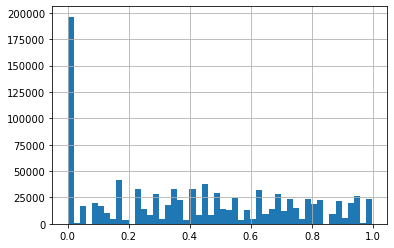

In [15]:
df['M_ZONE_START'].hist(bins=50)

In [16]:
df['M_ZONE_START'].fillna(0, inplace=True)
df['M_ZONE_FLAG'].fillna(0, inplace=True)

<AxesSubplot:>

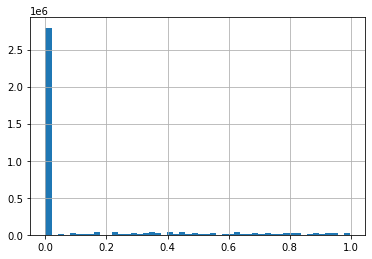

In [17]:
df['M_ZONE_START'].hist(bins=50)

In [18]:
df.isna().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                            0
M_ZONE_FLAG                                             0
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

In [19]:
df['M_RAIN_PERCENTAGE'].describe()

count    2.598054e+06
mean     1.147212e+00
std      3.353760e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.300000e+01
Name: M_RAIN_PERCENTAGE, dtype: float64

Visualize the Rain Percentage distribution

<AxesSubplot:>

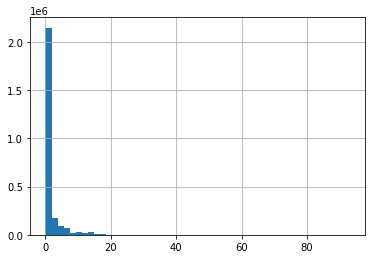

In [20]:
df['M_RAIN_PERCENTAGE'].sort_values(ascending=False).hist(bins=50)

In [21]:
df['M_RAIN_PERCENTAGE'].fillna(df['M_RAIN_PERCENTAGE'].mean(), inplace=True)

In [22]:
# replace missing values with missing and hot encode
df['GAMEHOST'].fillna('Missing', inplace=True)

In [23]:
df['M_TIME_OFFSET'].describe()

count    2.598054e+06
mean     5.917654e+00
std      1.642600e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+02
Name: M_TIME_OFFSET, dtype: float64

<AxesSubplot:>

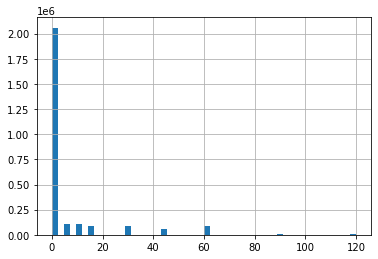

In [24]:
df['M_TIME_OFFSET'].hist(bins=50)

In [25]:
df['M_TIME_OFFSET'].fillna(0, inplace=True)

In [26]:
df.isna().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                            0
M_ZONE_FLAG                                             0
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

<AxesSubplot:>

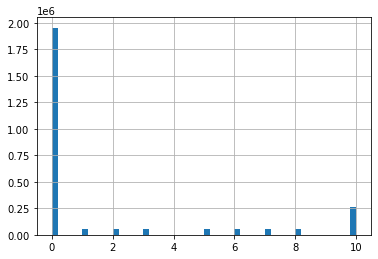

In [27]:
df['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE'].hist(bins=50)

In [28]:
df.drop('Unnamed: 58', axis=1, inplace=True)

In [29]:
df['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE'].describe()

count    2.598054e+06
mean     1.667811e+00
std      3.339838e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE, dtype: float64

In [30]:
df['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE'].value_counts()

0.0     1953651
10.0     261381
2.0       57869
3.0       57869
1.0       57869
8.0       57423
6.0       50586
5.0       50586
7.0       50586
9.0         234
Name: M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE, dtype: int64

In [31]:
df['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE'].fillna(0, inplace=True)

In [32]:
df['M_WEATHER_FORECAST_SAMPLES_M_WEATHER'].fillna(0, inplace=True)

In [33]:
df['M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE'].fillna(0, inplace=True)
df['M_TRACK_TEMPERATURE_CHANGE'].fillna(0, inplace=True)
df['M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE'].fillna(0, inplace=True)
df['M_AIR_TEMPERATURE_CHANGE'].fillna(0, inplace=True)

In [34]:
df.dropna(inplace=True)

In [35]:
df.shape

(3572327, 58)

In [36]:
df.isna().sum()

M_PACKET_FORMAT                                   0
M_GAME_MAJOR_VERSION                              0
M_GAME_MINOR_VERSION                              0
M_PACKET_VERSION                                  0
M_PACKET_ID                                       0
M_SESSION_UID                                     0
M_SESSION_TIME                                    0
M_FRAME_IDENTIFIER                                0
M_PLAYER_CAR_INDEX                                0
M_SECONDARY_PLAYER_CAR_INDEX                      0
M_BRAKING_ASSIST                                  0
M_SESSION_LINK_IDENTIFIER                         0
M_PIT_RELEASE_ASSIST                              0
TIMESTAMP                                         0
M_ZONE_START                                      0
M_ZONE_FLAG                                       0
M_PIT_STOP_WINDOW_IDEAL_LAP                       0
M_TRACK_TEMPERATURE                               0
M_TRACK_LENGTH                                    0
M_GAME_PAUSE

In [37]:
# OneHot encode df
df = pd.get_dummies(df, drop_first=True)

### Convert `TIMESTAMP` to date object

In [38]:
from datetime import datetime
df['TIMESTAMP'].drop_duplicates(inplace=True)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

## Feature Selection

So we are going to visualize a our features to further understand the correlations

<AxesSubplot:>

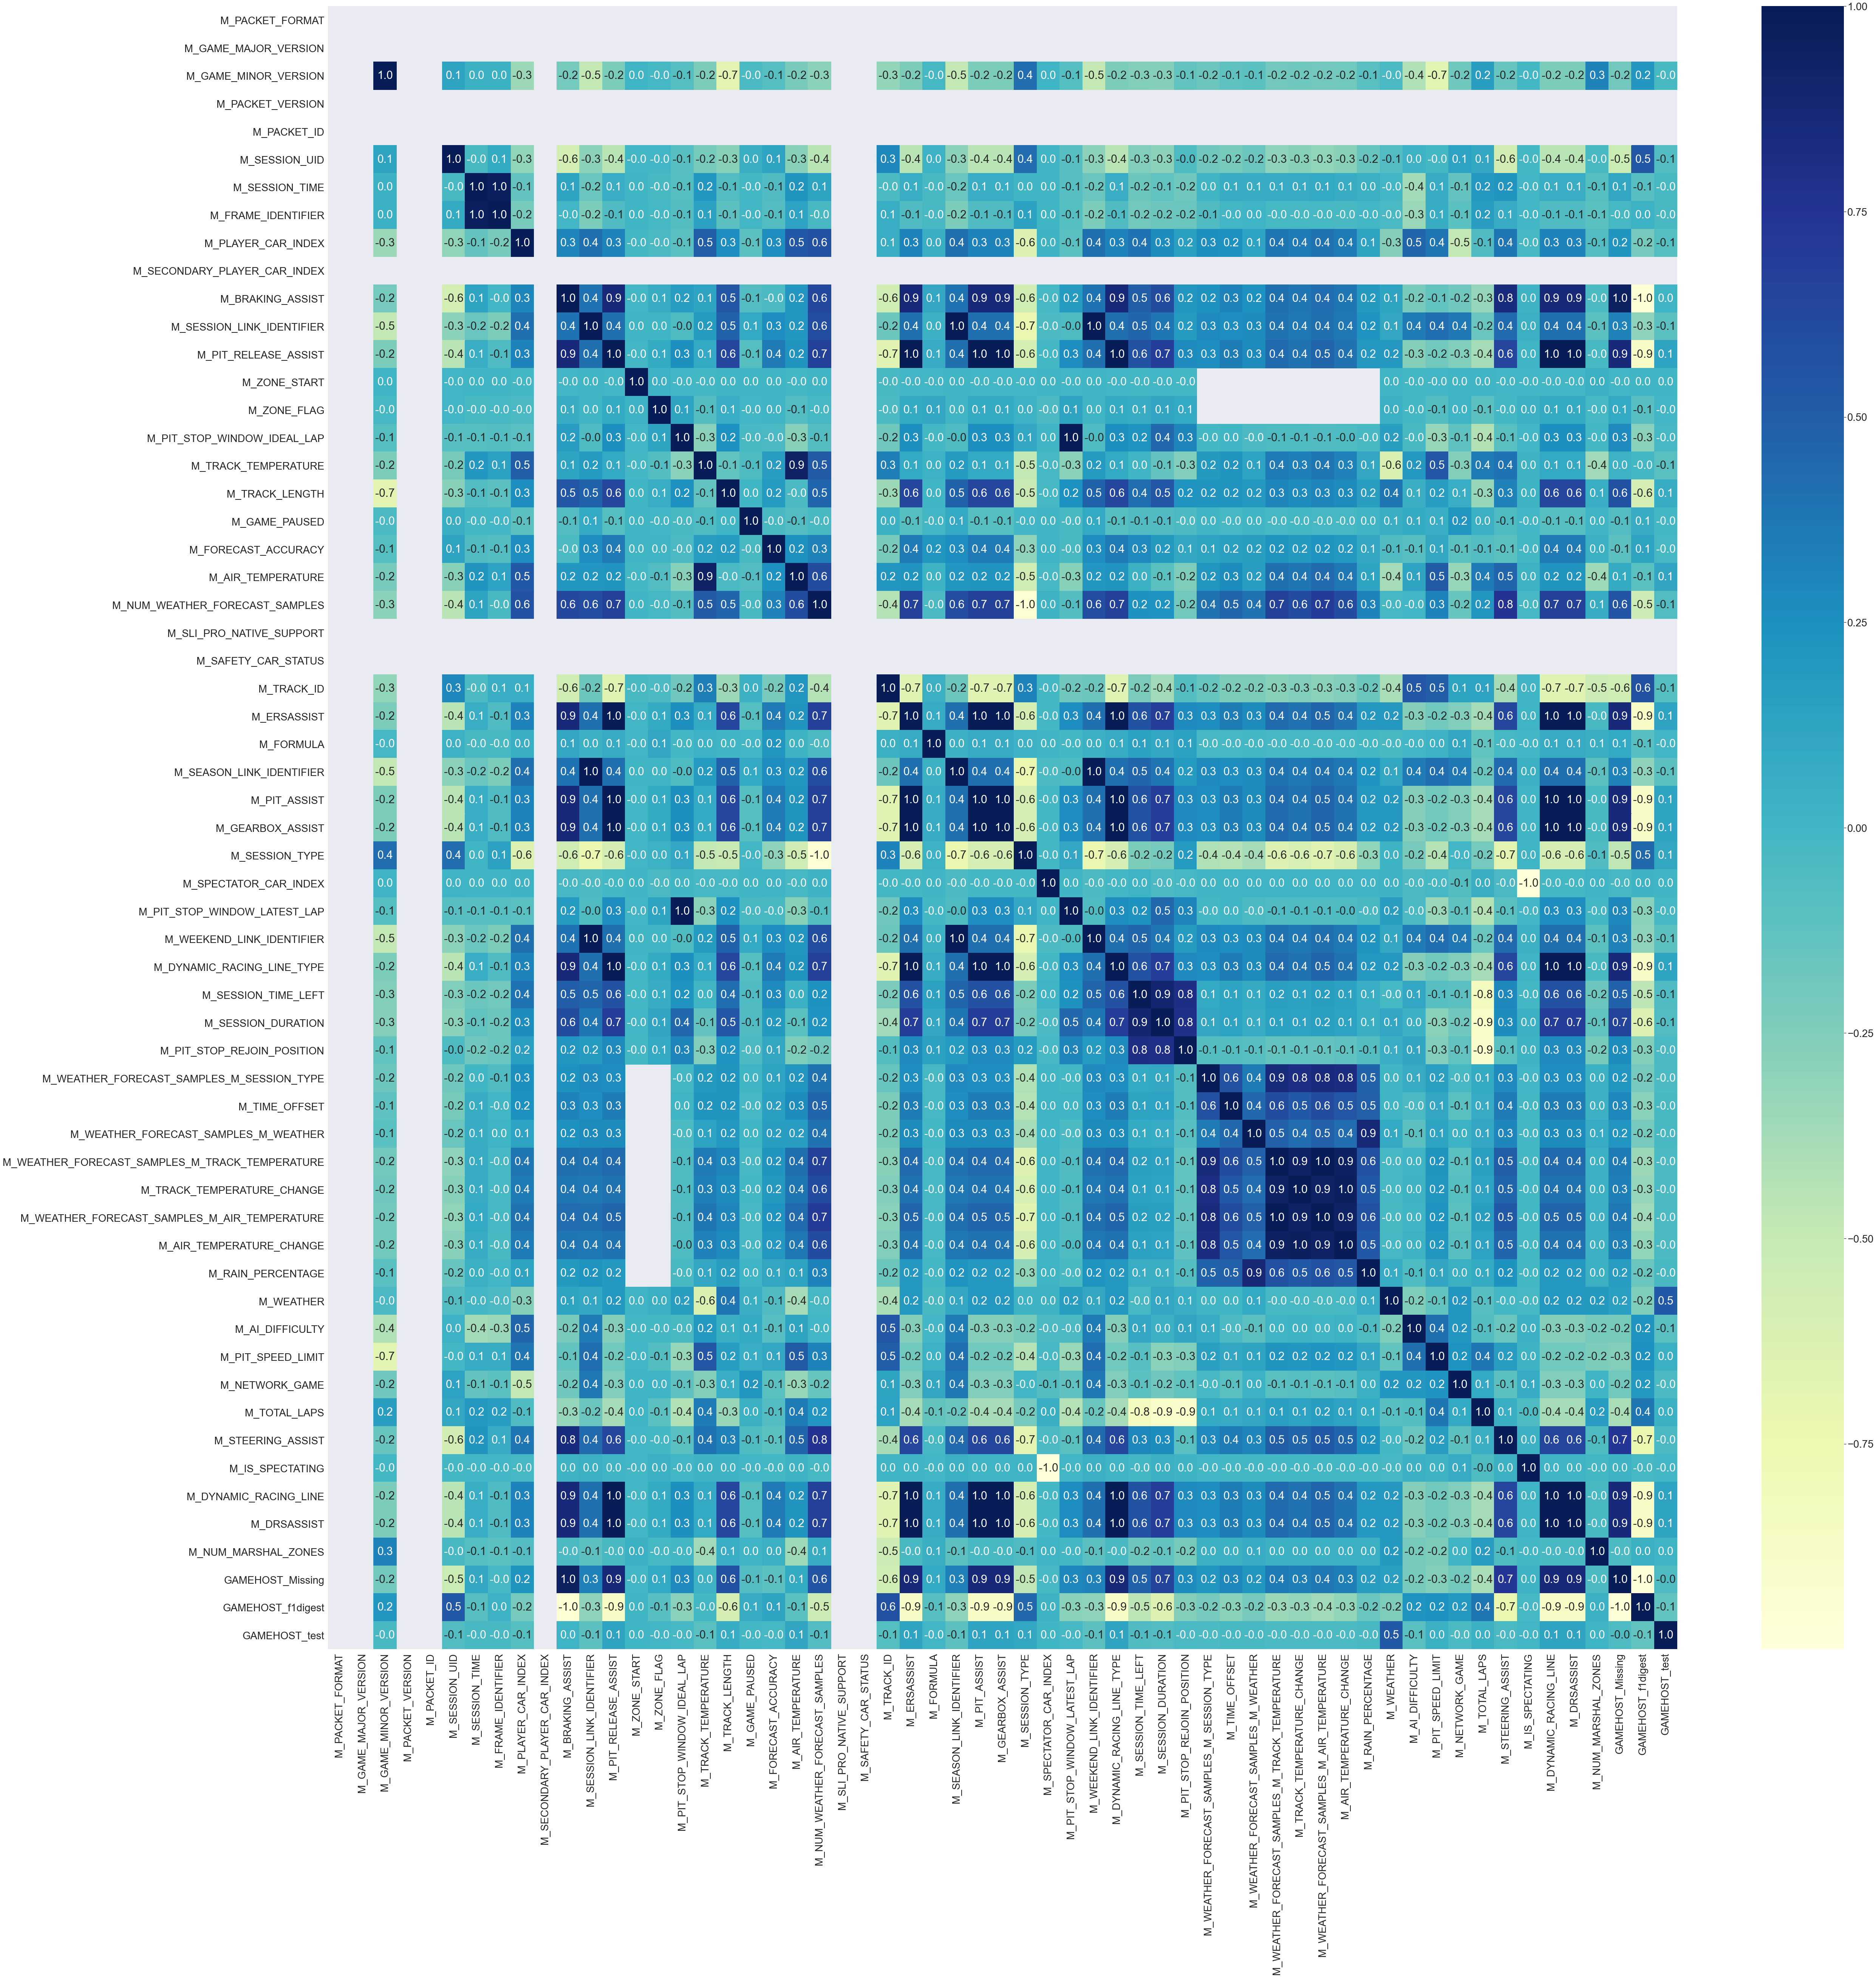

In [208]:
import seaborn as sns

plt.figure(figsize=(80,80))
sns.set(font_scale=2.5)
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='YlGnBu')

In [236]:
# # drop the none correlated feature variables
# non_corr_features = ['M_PACKET_FORMAT',
#                      'M_GAME_MAJOR_VERSION',
#                      'M_PACKET_VERSION',
#                      'M_PACKET_ID',
#                      'M_SECONDARY_PLAYER_CAR_INDEX',
#                      'M_SLI_PRO_NATIVE_SUPPORT',
#                      'M_SAFETY_CAR_STATUS',
#                      'Unnamed: 58']

# df.drop(non_corr_features, axis=1, inplace=True)

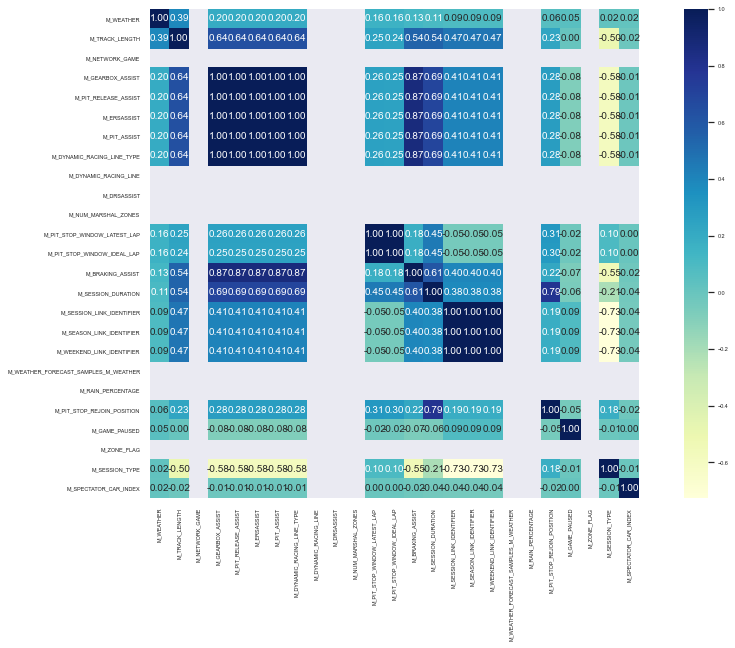

In [239]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(16, 9))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f',
                 cmap='YlGnBu', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

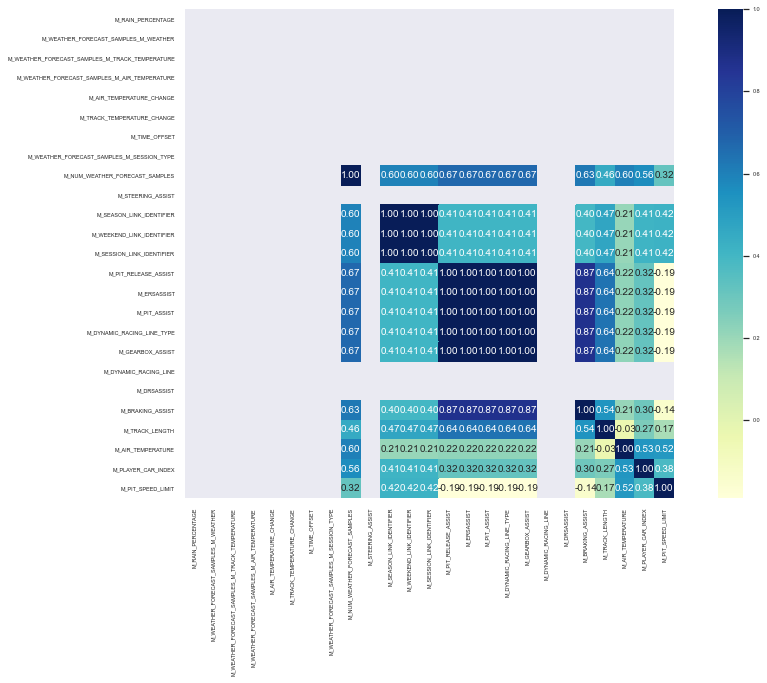

In [240]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(16, 9))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_RAIN_PERCENTAGE')['M_RAIN_PERCENTAGE'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f',
                 cmap='YlGnBu', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

In [39]:
df.drop('M_SESSION_LINK_IDENTIFIER', axis=1, inplace=True)
df.drop('M_SEASON_LINK_IDENTIFIER', axis=1, inplace=True)

## Removing the features with low variance

> [VarianceThreshold](https://scikit-learn.org/stable/modules/feature_selection.html) is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples. 
    - This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.
The formular: $$ Var{[X]} = p{(1-p)} $$

> The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features, in this case, it is Chi-Squared.

> We will also be creating our own custom feature selector

In [40]:
new_df = df.set_index('TIMESTAMP')

In [41]:
new_df.head(2)

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_PIT_RELEASE_ASSIST,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,GAMEHOST_f1digest,GAMEHOST_test
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.642361520,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0.088,0.0,0,33,4650,0,0,25,0,0,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.147212,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,1,0
1970-01-01 00:00:01.642361520,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,0,0,0.167,0.0,0,33,4650,0,0,25,0,0,0,28,0,0,0,1,13,255,0,0,0,0,600,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.147212,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,1,0


In [42]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

def feature_selector(X, y=None, means='VarianceThreshold', k=25):
    """
    Performs feature extraction on given data, uses sklearn VarianceThreshold by default
    
    Parameters
    ----------
    X : array containing feature datapoints
    y : array containing the target variable datapoints
    means : method for feature selection ['VarianceThreshold', 'SelectKBest', 'both']
    k : threshold value (If Variance is selected `k` will be divided by 100)
    
    Returns:
    Array of bests feature variables
    """
    
    
    var_thresh = VarianceThreshold(threshold=(k/100)*(1-(k/100)))
    transformed_df = var_thresh.fit(X)
    var_features = [feature for feature in X.columns if feature not in X.columns[var_thresh.get_support()]]
    return var_features

#     means = means.lower()
#     useful_features = dict()
    
#     if means == 'both':
#         print('=================Performing Feature Selection using both Variance and SelectKBest methods=================')
#         print('=================Note that this may take a while depending on how large your data is=================')
        
#         var_thresh = VarianceThreshold(threshold=(k/100)*(1-(k/100)))
#         transformed_df = var_thresh.fit(X)
#         features = [feature for feature in X.columns if feature not in X.columns[var_thresh.get_support()]]
    
#         #SelectKBest
# #         selectBest = SelectKBest(score_func=f_regression, k=k)
#         selectBest = SelectKBest(score_func=f_regression, k='all')
#         fit = selectBest.fit(X, y)
#         s_features = [column for column in X.columns if column not in X.columns[fit.get_support()]]
        
#         useful_features = {'VarianceThreshold': features, 'SelectKBest': s_features}
#         return useful_features
    
#     elif means == 'variancethreshold':
#         var_thresh = VarianceThreshold(threshold=(k/100)*(1-(k/100)))
#         transformed_df = var_thresh.fit(X)
#         var_features = [feature for feature in X.columns if feature not in X.columns[var_thresh.get_support()]]
#         return var_features
        
#     elif means == 'selectkbest':
#         #SelectKBest
#         selectBest = SelectKBest(score_func=chi2, k='all')
#         fit = selectBest.fit(X, y)
#         s_features = [column for column in X.columns if column not in X.columns[fit.get_support()]]
#         return s_features
    
#     raise ValueError('The means value provided doesn\'t exist you can try any of these ["both", "variancethreshold", "selectkbest"]')

In [43]:
def corr_feature_selector(X, threshold):
    """
    Performs feature extraction on given data
    
    Parameters
    ----------
    X : array containing feature datapoints
    threshold : threshold value (If Variance is selected `k` will be divided by 100)
    
    Returns:
    Array of bests feature variables
    """
    col_corr = set()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

We created two functions to help us make feature selection, anyone you dim okay for your problem... please use

In [44]:
# rain_percentage_features = feature_selector(new_df, y=df['M_RAIN_PERCENTAGE'], means='both', k=0)

In [46]:
# Select the features for M_RAIN_PERCENTAGE
X = new_df.drop('M_RAIN_PERCENTAGE', axis=1)
y = new_df['M_RAIN_PERCENTAGE']

## Create train and test splits for time series data
split_size = int(.8 * len(df))

# Train, test split
X_train, rain_percentage_y_train = df[:split_size], df['M_RAIN_PERCENTAGE'][:split_size]
X_test, rain_percentage_y_test = df[split_size:], df['M_RAIN_PERCENTAGE'][split_size:]

X_train.shape, rain_percentage_y_train.shape, X_test.shape, rain_percentage_y_test.shape

((2857861, 57), (2857861,), (714466, 57), (714466,))

In [47]:
import os
# os.mkdir('Rain Percentage Dataset')

# Save dataset to folder
rain_percentage_features_train = corr_feature_selector(X_train, threshold=.6)
rain_percentage_features_train_df = X_train.drop(rain_percentage_features_train, axis=1)
rain_percentage_features_test_df = X_test[rain_percentage_features_train]

rain_percentage_features_test_df = X_test[rain_percentage_features_train]

# Export Rain Percentage feature data
rain_percentage_features_train_df['TIMESTAMP'] = df['TIMESTAMP']
rain_percentage_features_train_df.to_csv('Rain Percentage Dataset/X_train.csv', index=None)
rain_percentage_features_test_df.to_csv('Rain Percentage Dataset/X_test.csv', index=None)
rain_percentage_y_train.to_csv('Rain Percentage Dataset/y_train.csv', index=None)
rain_percentage_y_test.to_csv('Rain Percentage Dataset/y_test.csv', index=None)

In [49]:
# Make a folder for weather dataset
# os.mkdir('Weather Dataset')

# Select the features for M_WEATHER
X = new_df.drop('M_WEATHER', axis=1)
y = new_df['M_WEATHER']

## Create train and test splits for time series data
split_size = int(.8 * len(df))

# Train, test split
weather_X_train, weather_y_train = df[:split_size], df['M_WEATHER'][:split_size]
weather_X_test, weather_y_test = df[split_size:], df['M_WEATHER'][split_size:]
weather_X_train.shape, weather_y_train.shape, weather_X_test.shape, weather_y_test.shape

# Save dataset to folder
weather_features_train = corr_feature_selector(weather_X_train, threshold=.6)
weather_features_train_df = weather_X_train.drop(weather_features_train, axis=1)
weather_features_test_df = weather_X_test[weather_features_train]

rain_percentage_features_test_df = X_test[rain_percentage_features_train]

# Export Rain Percentage feature data
weather_features_train_df['TIMESTAMP'] = df['TIMESTAMP']
weather_features_train_df.to_csv('Weather Dataset/X_train.csv', index=None)
weather_features_test_df.to_csv('Weather Dataset/X_test.csv', index=None)
weather_y_train.to_csv('Weather Dataset/y_train.csv', index=None)
weather_y_test.to_csv('Weather Dataset/y_test.csv', index=None)

## Visualize our Data using sweetviz

In other to proper understand our data we'll be creating a sweetviz report of our data

In [43]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 332 kB/s            
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [44]:
import sweetviz as sv

In [45]:
sv.analyze(df).show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Time Series Stationarity Test

In [46]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [72]:
series = df['M_RAIN_PERCENTAGE'].values

# Hypothesis
**H1:** The given series is not stationary in nature <br>
**H2:** The given series is stationary

* if adf < critical value reject the null hypothesis
* if the adf > critical value accept the null hypothesis

## Modelling

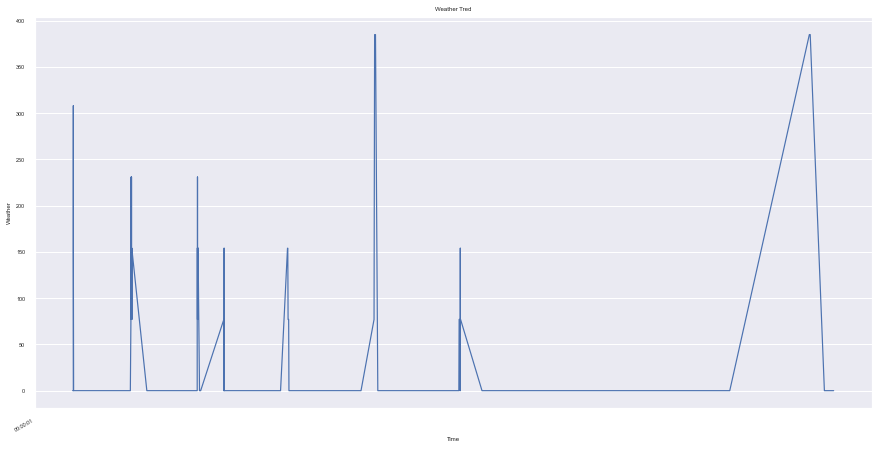

In [513]:
plt.figure(figsize=(15,8))
df.groupby('TIMESTAMP')['M_WEATHER'].sum().plot(linewidth=1.2, 
                                             ylabel='Weather', 
                                             xlabel='Time', 
                                             title='Weather Tred');

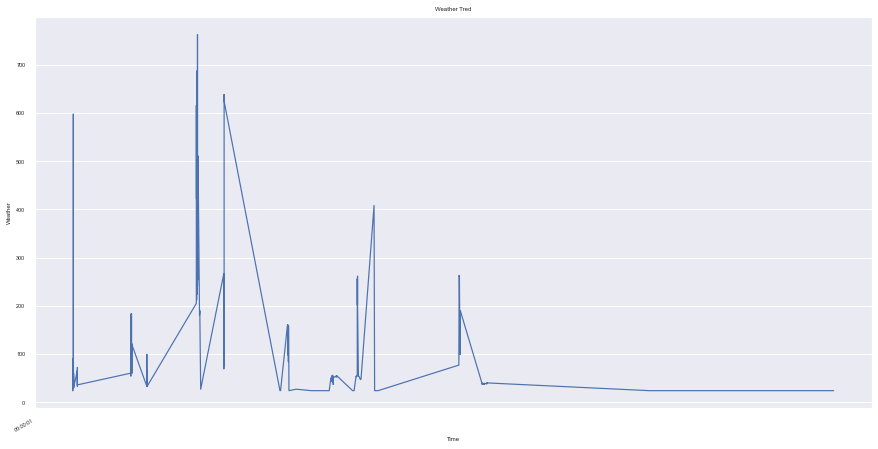

In [518]:
plt.figure(figsize=(15,8))
df.groupby('TIMESTAMP')['M_RAIN_PERCENTAGE'].sum().plot(linewidth=1.2, 
                                             ylabel='Weather', 
                                             xlabel='Time', 
                                             title='Weather Tred');

In [50]:
data = new_df[['M_WEATHER','M_RAIN_PERCENTAGE']]

In [51]:
data

,M_WEATHER,M_RAIN_PERCENTAGE
TIMESTAMP,,
1970-01-01 00:00:01.642361520,0,1.147212
1970-01-01 00:00:01.642361520,0,1.147212
1970-01-01 00:00:01.642361520,0,1.147212
1970-01-01 00:00:01.642361520,0,1.147212
1970-01-01 00:00:01.642361520,0,1.147212
...,...,...
1970-01-01 00:00:01.642288491,0,0.000000
1970-01-01 00:00:01.642288491,0,0.000000
1970-01-01 00:00:01.642288491,0,0.000000


In [52]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [54]:
data

,M_WEATHER,M_RAIN_PERCENTAGE
TIMESTAMP,,
1970-01-01 00:00:01.642361520,0.0,1.147212
1970-01-01 00:00:01.642361520,0.0,1.147212
1970-01-01 00:00:01.642361520,0.0,1.147212
1970-01-01 00:00:01.642361520,0.0,1.147212
1970-01-01 00:00:01.642361520,0.0,1.147212
...,...,...
1970-01-01 00:00:01.642288491,0.0,0.000000
1970-01-01 00:00:01.642288491,0.0,0.000000
1970-01-01 00:00:01.642288491,0.0,0.000000


In [55]:
# Normalize our data
scaler = StandardScaler()
scaler = scaler.fit(data)
scaled_data = scaler.transform(data)

In [56]:
scaled_data

array([[-4.59300414e-01, -1.12282478e-07],
       [-4.59300414e-01, -1.12282478e-07],
       [-4.59300414e-01, -1.12282478e-07],
       ...,
       [-4.59300414e-01, -4.01109834e-01],
       [-4.59300414e-01, -4.01109834e-01],
       [-4.59300414e-01, -4.01109834e-01]])

In [57]:
HORIZON = 5
WINDOW = 60

In [58]:
def get_labelled_window(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset
    
    Eg. if horizon=1
    Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6],[7])
    """
    return x[:, :-horizon], x[:,-horizon:]

In [59]:
def make_windows(x, window_size=WINDOW, horizon=HORIZON):
    
    # Create a window of specific window size 
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    
    # Create a 2D array of multiple window steps
    window_indices = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    
    # Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indices]

    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    
    return windows, labels

In [60]:
windows, labels = make_windows(scaled_data)

In [61]:
windows.shape, labels.shape

((3572263, 60, 2), (3572263, 5, 2))

In [62]:
windows[1], labels[1]

(array([[-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -1.12282478e-07],
        [-4.59300414e-01, -4.01109834e-01],
        [-4.59300414e-01, -4.01109834e-01],
        [-4.59300414e-01, -4.011

### Split the window and label data into train and test set

In [63]:
def train_test_split(windows, labels, size=.2):
    """
    Splits windows and labels into train and test splits.
    """
    
    split_size = int(len(windows) * (1-size))
    
    window_train = windows[:split_size]
    window_test = windows[split_size:]
    
    label_train = windows[:split_size]
    label_test = windows[split_size:]
    
    return window_train, window_test, label_train, label_test

In [64]:
X_train, X_test, y_train, y_test = train_test_split(windows, labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2857810, 60, 2), (714453, 60, 2), (2857810, 60, 2), (714453, 60, 2))

In [65]:
# Convert our data to tensors
X_train = tf.constant(tf.cast(X_train, tf.float32))
y_train = tf.constant(tf.cast(y_train, tf.float32))

X_test = tf.constant(tf.cast(X_test, tf.float32))
y_test = tf.constant(tf.cast(y_test, tf.float32))

2022-02-22 20:32:17.456585: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [66]:
X_train.shape, y_train.shape

(TensorShape([2857810, 60, 2]), TensorShape([2857810, 60, 2]))

## Helper Functions

In [67]:
import datetime
import os

time_stamp = datetime.datetime.now().strftime('%Y_%m_%d_%H%M%S')

def learning_rate_scheduler():
    """
    A learning rate callback
    """
    
    lr = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 3e-1*10 ** (epochs/20))
    return lr
  
def model_checkpoint_callback(experiment_name:str):
    """Creates a ModelCheckpoint callback 

    Args:
        experiment_name (str): Name of current experiment (e.g 'base_model')

    Returns:
        _type_: _description_
    """
    checkpoint_path = os.path.join('Callbacks','checkpoints',time_stamp+'_'+experiment_name.replace(' ','_').lower())
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                           verbose=1,
                                                           save_best_weights_only=True)
    return checkpoint_callback

def evaluate_model(checkpoint_path, x_test=X_test, y_test=y_test):
    """
    Loads presaved model checkpoint callbacks returns a model evaluation score.
    
    Parameters:
    -----------
    checkpoint_path : The path to your saved modelcheckpoint callbacks e.g. `Callbacks/checkpoints/...`
    x_test: Array of feature Variables
    y_test: Array of labels
    """
    
    model = tf.keras.models.load_model(checkpoint)
    return model.evaluate(x_test, y_test)

def predict(model, X):
    """
    Makes predictions on X using model
    """
    predictions = model.predict(X)
    return tf.squeeze(predictions)

In [75]:
# Create a random seed to make our model reproducible
tf.random.set_seed(42)

base_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(60, 2)),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(2)
], name='base_model')

# compile our model
base_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit our model
history = base_model.fit(X_train, 
                        y_train, 
                        epochs=5, 
                        batch_size=60,
                        validation_data=(X_test, y_test),
                        shuffle=False,
                        callbacks=[model_checkpoint_callback('BaseModel')])

# summarize our model
# base_model.summary()

Epoch 1/5
  415/47631 [..............................] - ETA: 30:46 - loss: 0.1394 - mae: 0.1394

KeyboardInterrupt: 

In [102]:
base_model.summary()

Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 64)            17152     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 29,634
Trainable params: 29,634
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Evaluate our model performance from the best saved checkpoint
evaluate_model('Callbacks/checkpoints/', 
               x_test=X_test, 
               y_test=y_test)

NameError: name 'checkpoint' is not defined

## Make a forecast
**📝 Note:** These are only psuedo forecasts

In [ ]:
y_pred = predict(base_model, X_test)

In [78]:
def plot_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps against values
    
    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (indices from timesteps)
    end : wher to end the plot
    label : label to show on plot values, default None
    """
    
    # plot series
    plt.figure(figsize=(10,7))
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel('Time')
    
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [89]:
# Plot our test data first
plot_series(timesteps=np.array(X_test).reshape(-1,)[-len(X_test):], values=np.array(y_test).reshape(-1,)[:, 0], label='Test Data')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [103]:
n_future = 60
forecast_period_dates = pd.date_range(list(data.index)[-1], periods=n_future, freq='5M').tolist()

In [104]:
forecast = predict(base_model, X_test[-n_future:])

In [136]:
y_pred_future = scaler.inverse_transform(forecast)
forecast_dates = []
for i in forecast_period_dates:
    forecast_dates.append(i.strftime('%H-%M%S'))


forecast_df = pd.DataFrame({'Date':np.array(forecast_dates), 'Weather':forecast[:,0], 'RAIN_PER':forecast[:,1]})

In [137]:
forecast_df

,Date,Weather,RAIN_PER
0,00-0001,-0.443992,-0.361427
1,00-0001,-0.443931,-0.362026
2,00-0001,-0.443853,-0.362457
3,00-0001,-0.443763,-0.362721
4,00-0001,-0.443654,-0.362824
5,00-0001,-0.443523,-0.362793
6,00-0001,-0.443370,-0.362655
7,00-0001,-0.443198,-0.362443
8,00-0001,-0.443010,-0.362180
9,00-0001,-0.442809,-0.361885


<AxesSubplot:xlabel='Date'>

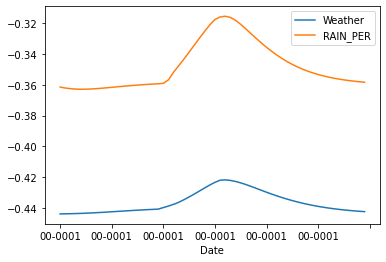

In [135]:
forecast_df.set_index('Date').plot()

ValueError: x and y can be no greater than 2-D, but have shapes (714453, 60, 2) and (714453, 2)

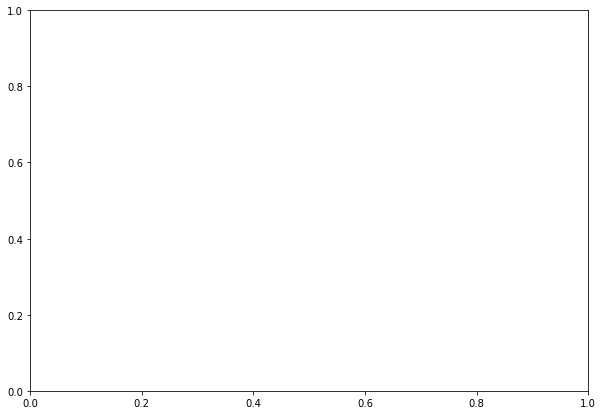

In [145]:
plot_series(timesteps=X_test[-len(X_test):], values=y_test[:, 0], label='Test Data')

In [147]:
! git clone https://github.com/gamesconsort/games-formulaaihack.git

Cloning into 'games-formulaaihack'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 93 (delta 28), reused 30 (delta 2), pack-reused 0
Receiving objects: 100% (93/93), 15.76 MiB | 343.00 KiB/s, done.
Resolving deltas: 100% (28/28), done.
